In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("student_habits_performance.csv")

In [3]:
df.sample(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
237,S1237,22,Female,2.0,1.3,3.4,Yes,75.0,4.9,Fair,1,High School,Average,9,No,53.8
519,S1519,18,Male,2.9,2.2,1.7,Yes,99.0,5.3,Good,2,Bachelor,Average,7,No,71.2
557,S1557,22,Male,3.8,3.6,4.3,No,100.0,7.3,Poor,1,Bachelor,Poor,7,Yes,69.9
64,S1064,23,Male,3.2,1.7,2.1,No,80.8,5.2,Good,3,High School,Poor,4,Yes,68.6
813,S1813,20,Female,3.8,4.9,1.9,No,75.2,6.3,Poor,5,High School,Average,6,No,65.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [6]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [7]:
# show missing values rows
df[df.isna().any(axis=1)]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,S1010,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,S1033,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,S1047,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,S1074,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,S1093,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,S1921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,S1925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,S1939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


In [8]:
most_frequent = df['parental_education_level'].mode()[0]
df['parental_education_level'].fillna(most_frequent, inplace=True)

/var/folders/7g/xy_1dy1n2l747bpvqpmdnltw0000gn/T/ipykernel_78195/322089674.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna(most_frequent, inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

In [10]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

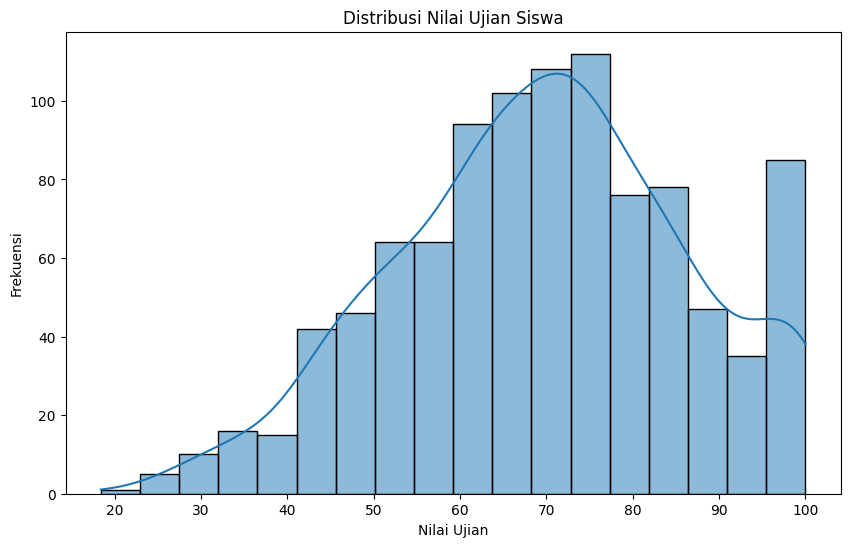

In [11]:
# Distribusi Variabel Target (Exam Score)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='exam_score', kde=True)
plt.title('Distribusi Nilai Ujian Siswa')
plt.xlabel('Nilai Ujian')
plt.ylabel('Frekuensi')
plt.show()

In [12]:
print(f"Nilai minimum: {df['exam_score'].min()}")
print(f"Nilai maksimum: {df['exam_score'].max()}")
print(f"Nilai rata-rata: {df['exam_score'].mean():.2f}")
print(f"Standar deviasi: {df['exam_score'].std():.2f}")

Nilai minimum: 18.4
Nilai maksimum: 100.0
Nilai rata-rata: 69.60
Standar deviasi: 16.89


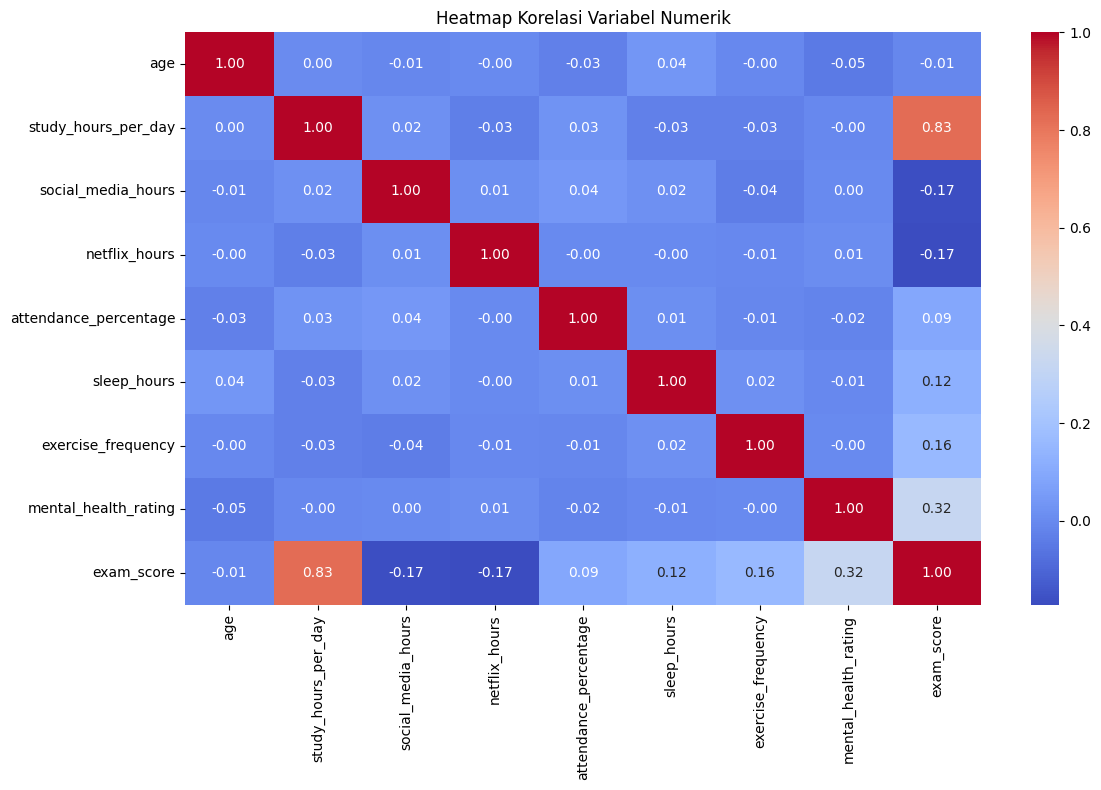

In [13]:
# Analisis Korelasi antara Variabel Numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.tight_layout()
plt.show()

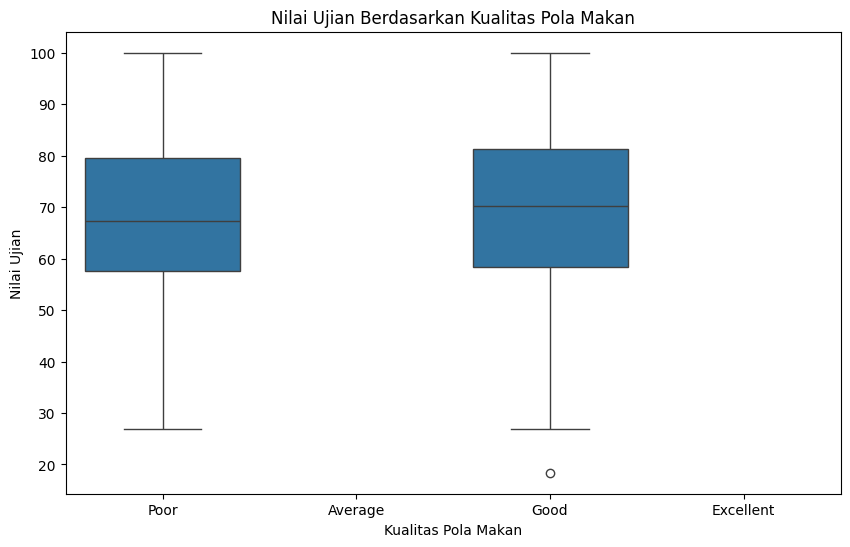

In [14]:
# Analisis Variabel Kategorikal
# Pengaruh Kualitas Pola Makan terhadap Nilai Ujian
plt.figure(figsize=(10, 6))
sns.boxplot(x='diet_quality', y='exam_score', data=df, order=['Poor', 'Average', 'Good', 'Excellent'])
plt.title('Nilai Ujian Berdasarkan Kualitas Pola Makan')
plt.xlabel('Kualitas Pola Makan')
plt.ylabel('Nilai Ujian')
plt.show()

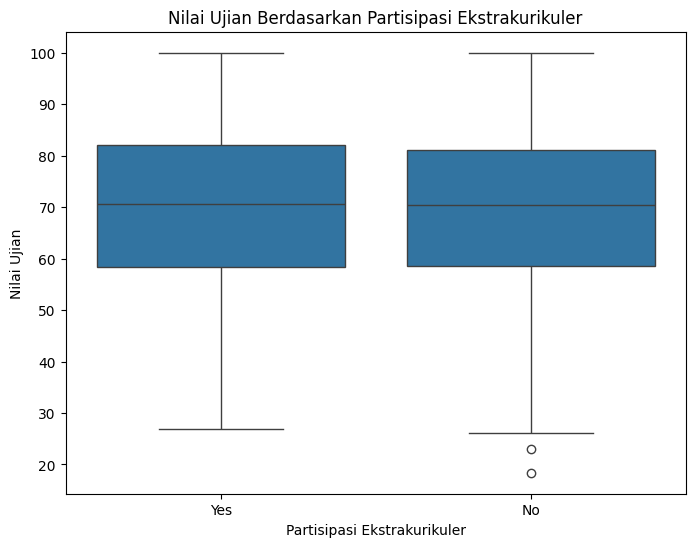

In [15]:
# Pengaruh Partisipasi Ekstrakurikuler terhadap Nilai Ujian
plt.figure(figsize=(8, 6))
sns.boxplot(x='extracurricular_participation', y='exam_score', data=df)
plt.title('Nilai Ujian Berdasarkan Partisipasi Ekstrakurikuler')
plt.xlabel('Partisipasi Ekstrakurikuler')
plt.ylabel('Nilai Ujian')
plt.show()

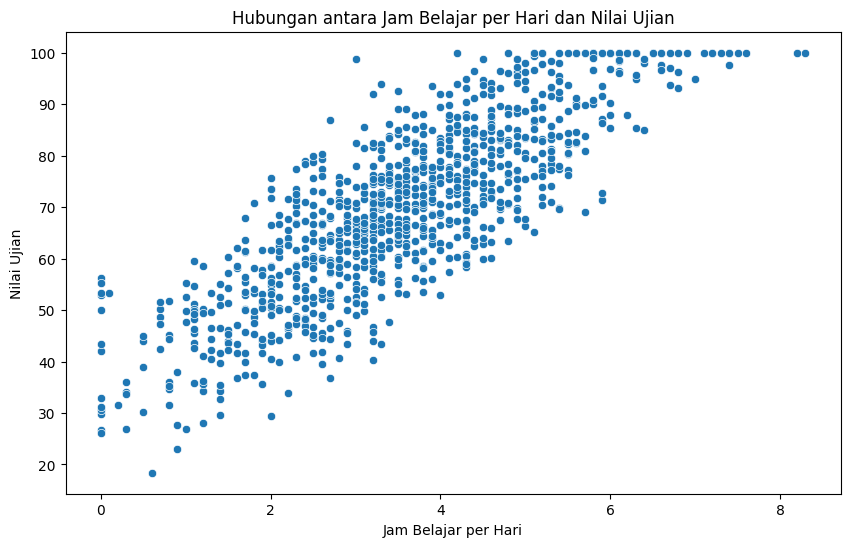

In [16]:
# Analisis Bivariat
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('Hubungan antara Jam Belajar per Hari dan Nilai Ujian')
plt.xlabel('Jam Belajar per Hari')
plt.ylabel('Nilai Ujian')
plt.show()

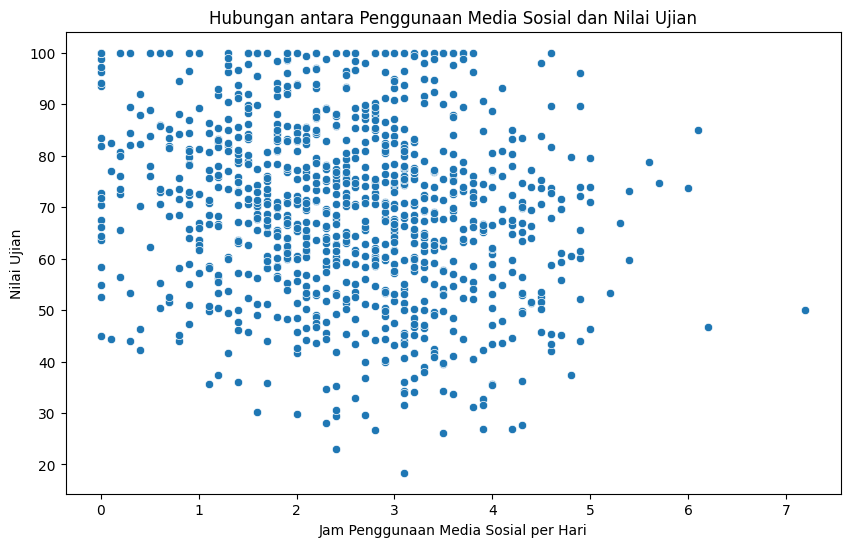

In [17]:
# Hubungan antara Penggunaan Media Sosial dan Nilai Ujian
plt.figure(figsize=(10, 6))
sns.scatterplot(x='social_media_hours', y='exam_score', data=df)
plt.title('Hubungan antara Penggunaan Media Sosial dan Nilai Ujian')
plt.xlabel('Jam Penggunaan Media Sosial per Hari')
plt.ylabel('Nilai Ujian')
plt.show()

# Data Preparation

In [18]:
# drop kolom student_id
df.drop(columns=['student_id'], inplace=True)

In [19]:
# Encoding Variabel Kategorikal
# One-Hot Encoding untuk variabel kategorik

categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 
                    'internet_quality', 'extracurricular_participation']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [20]:
# Ordinal Encoding untuk variabel diet_quality
diet_mapping = {'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3}
df['diet_quality_encoded'] = df['diet_quality'].map(diet_mapping)

In [21]:
# Feature Scaling
# Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler

numeric_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                     'attendance_percentage', 'sleep_hours', 'exercise_frequency', 
                     'mental_health_rating']

scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

In [22]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

X = df_encoded.drop('exam_score', axis=1)
y = df_encoded['exam_score']

# Memilih fitur terbaik
selector = SelectKBest(f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Mendapatkan nama fitur terpilih
selected_features_idx = selector.get_support(indices=True)
selected_features = X.columns[selected_features_idx]
print("Fitur terpilih:", selected_features)

Fitur terpilih: Index(['study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'diet_quality_Poor',
       'parental_education_level_Master', 'internet_quality_Good'],
      dtype='object')


In [23]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print(f"Jumlah sampel training: {X_train.shape[0]}")
print(f"Jumlah sampel testing: {X_test.shape[0]}")

Jumlah sampel training: 800
Jumlah sampel testing: 200


# Modelling

In [24]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membuat dan melatih model Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_lr = lr_model.predict(X_test)

# Evaluasi model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MAE: {mae_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R²: {r2_lr:.4f}")

Linear Regression:
MAE: 4.1011
MSE: 25.7009
RMSE: 5.0696
R²: 0.8998


In [25]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Membuat dan melatih model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor:")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")


Random Forest Regressor:
MAE: 4.8855
MSE: 38.2388
RMSE: 6.1838
R²: 0.8509


In [26]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Membuat dan melatih model Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_gb = gb_model.predict(X_test)

# Evaluasi model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print(f"MAE: {mae_gb:.4f}")
print(f"MSE: {mse_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R²: {r2_gb:.4f}")


Gradient Boosting Regressor:
MAE: 4.6558
MSE: 30.9062
RMSE: 5.5593
R²: 0.8795


In [33]:
# Grid Search untuk Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
}

# Grid Search untuk Linear Regression
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train, y_train)

best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
mae_best_lr = mean_absolute_error(y_test, y_pred_best_lr)
mse_best_lr = mean_squared_error(y_test, y_pred_best_lr)
rmse_best_lr = np.sqrt(mse_best_lr)
r2_best_lr = r2_score(y_test, y_pred_best_lr)


print("\nLinear Regression (setelah tuning):")
print(f"MAE: {mae_best_lr:.4f}")
print(f"MSE: {mse_best_lr:.4f}")
print(f"RMSE: {rmse_best_lr:.4f}")
print(f"R²: {r2_best_lr:.4f}")



Linear Regression (setelah tuning):
MAE: 4.1011
MSE: 25.7009
RMSE: 5.0696
R²: 0.8998


# Evaluation

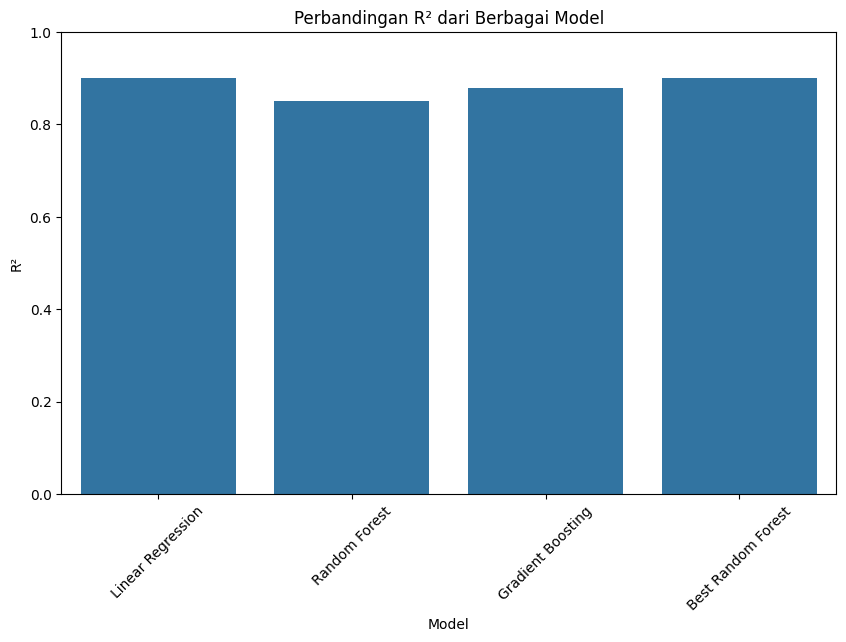

In [34]:
# Perbandingan Model
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Best Random Forest']
model_scores = [r2_lr, r2_rf, r2_gb, r2_best_lr]
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=model_scores)
plt.title('Perbandingan R² dari Berbagai Model')
plt.xlabel('Model')
plt.ylabel('R²')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()